### in this notebook we'll test the .tflite efficiendet models 

models taken from: https://tfhub.dev/s?dataset=coco-2017&deployment-format=lite&subtype=module,placeholder&tf-version=tf2

In [1]:
import tensorflow_hub as hub
from PIL import Image
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [102]:
def get_pred_tflite(interpreter, img_path, img_size=(320,320)):
    ori_img = tf.keras.preprocessing.image.load_img(img_path, target_size=img_size)
    input_data = np.array(np.expand_dims(ori_img, 0))
    
    # Get input and output tensors.
    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()
    
    interpreter.set_tensor(input_details[0]['index'], input_data)
    interpreter.invoke()

    
    boxes = interpreter.get_tensor(output_details[0]['index'])
    scores = interpreter.get_tensor(output_details[2]['index'])
    classes = interpreter.get_tensor(output_details[1]['index'])
    num_detections = interpreter.get_tensor(output_details[3]['index'])
    
    return boxes, classes, scores, num_detections

In [150]:
def viz_tflite(interpreter, img_path, proba_threshold=0.5, img_size=(320,320)):
    boxes, classes, scores, num_detections = get_pred_tflite(interpreter, img_path, img_size)
    image = cv2.imread(img_path)
    imheight, imwidth = image.shape[:2]
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    for i, score in enumerate(scores[0]):
        if score > proba_threshold:
            labelindex = int(classes[0][i])
            if labelindex == 0:
                label = 'person'
            elif labelindex in (15, 16, 17, 18, 19, 20, 21, 22, 23, 24):
                label = 'animal'
            else:
                label = 'unknown'
            ymin = int(boxes[0][i][0] * imheight)
            xmin = int(boxes[0][i][1] * imwidth)
            height = int(boxes[0][i][2] * imheight)
            width = int(boxes[0][i][3] * imwidth)
            cv2.putText(image, label, (xmin, ymin-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255,255,255), 2)
            cvrect = cv2.rectangle(image, (xmin, ymin), (width, height), (255,255,255), 1)
    plt.figure(figsize=(10,10))
    plt.imshow(image)

### efficientdet lite0 

In [169]:
model_path='lite-model_efficientdet_lite0_detection_metadata_1.tflite'
# Load TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_path)
interpreter.allocate_tensors()

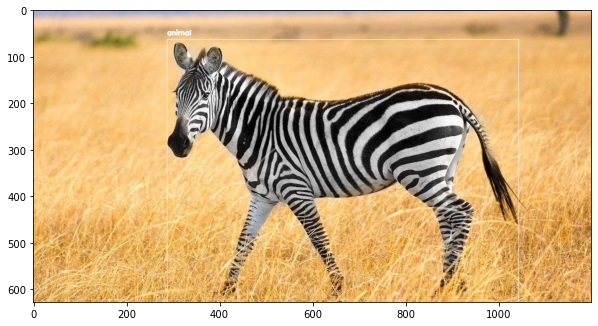

In [152]:
viz_tflite(interpreter, 'zebra_horflip.jpg', 0.5)

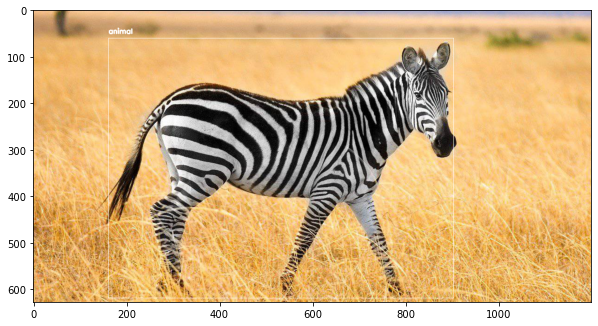

In [153]:
viz_tflite(interpreter, 'zebra.jpg', 0.5)

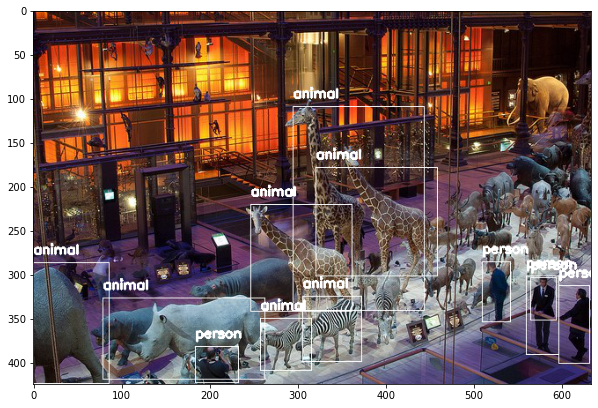

In [161]:
viz_tflite(interpreter, 'person_animals.jpg', 0.3)

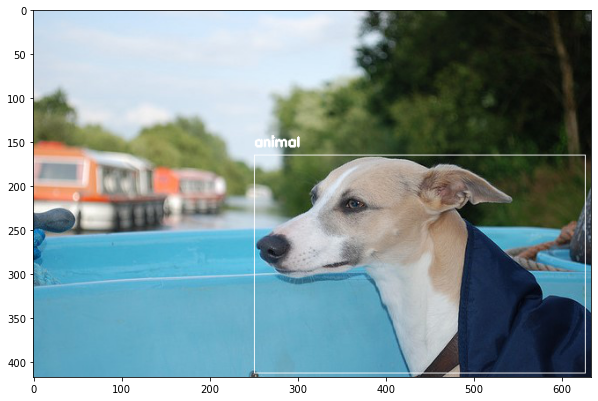

In [155]:
viz_tflite(interpreter, 'with_unknown_class.jpg', 0.5)

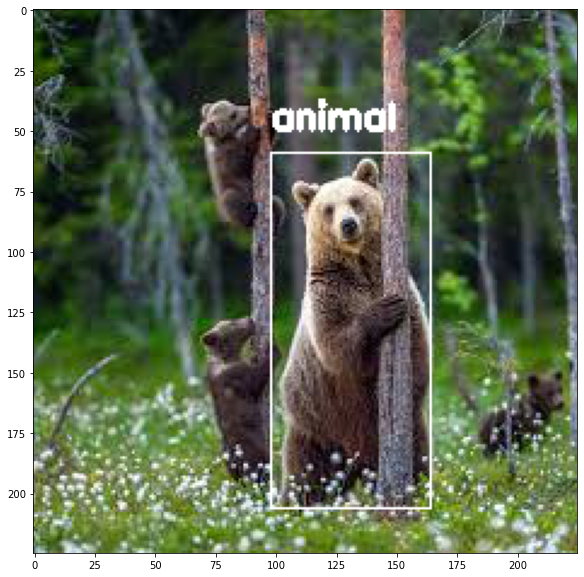

In [156]:
viz_tflite(interpreter, 'animal1.jpg', 0.5)

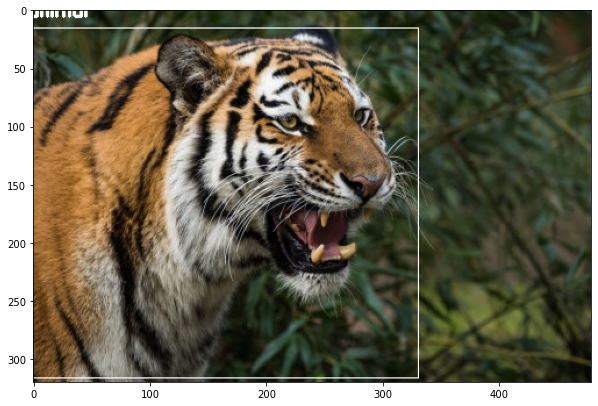

In [157]:
viz_tflite(interpreter, 'animal2.jpg', 0.5)

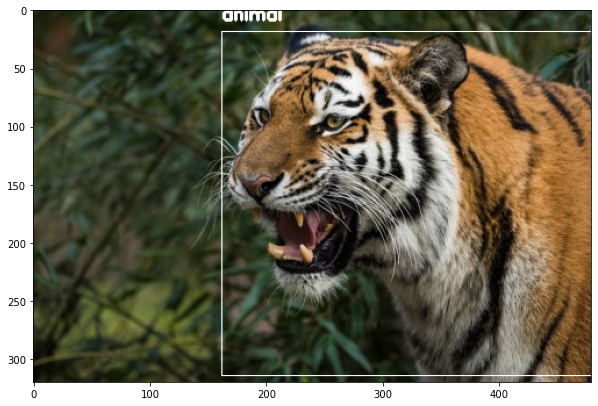

In [158]:
viz_tflite(interpreter, 'animal2_flipped.jpg', 0.5)

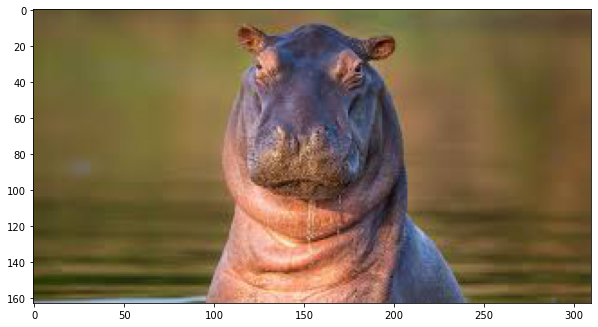

In [159]:
viz_tflite(interpreter, 'animal3.jpg', 0.5)

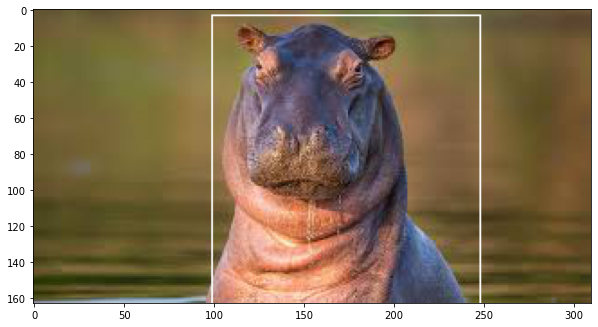

In [160]:
viz_tflite(interpreter, 'animal3.jpg', 0.3)

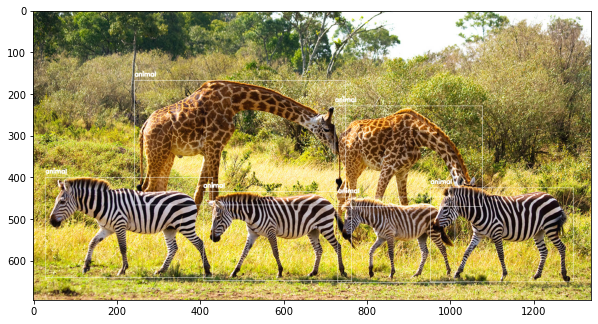

In [170]:
viz_tflite(interpreter, 'animals1.jpg', 0.5)

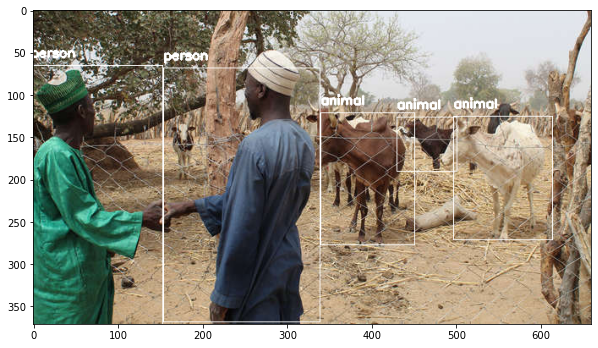

In [174]:
viz_tflite(interpreter, 'person_animal2.jpg', 0.3)

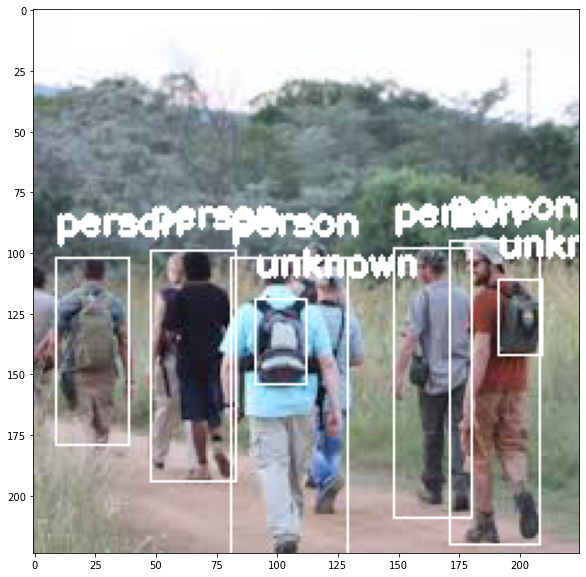

In [176]:
viz_tflite(interpreter, 'people.jpg', 0.4)

### efficientdet lite3x

In [162]:
model_path='lite-model_efficientdet_lite3x_detection_metadata_1.tflite'
# Load TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_path)
interpreter.allocate_tensors()

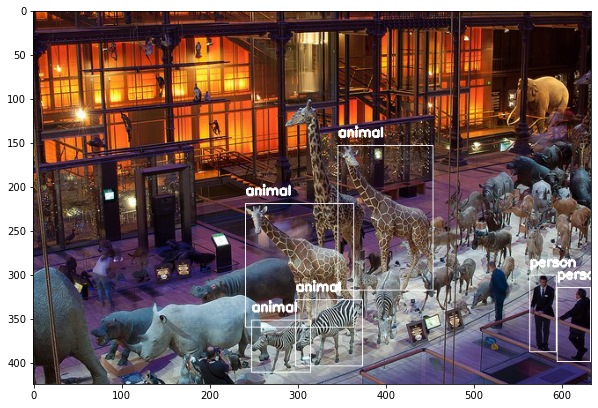

In [164]:
viz_tflite(interpreter, 'person_animals.jpg', 0.5, (640, 640))

### appendix 

In [166]:
img_path = 'zebra.jpg'
img = cv2.imread(img_path)
imheight, imwidth = img.shape[:2]
imheight, imwidth

(627, 1200)